Data Dictionary

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd

df = pd.read_csv("titanic_completa_oficial.csv", na_values = "?")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [4]:
((df.isnull().sum())/df.shape[0])*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

In [5]:
import numpy as np
df.select_dtypes(exclude = np.number)

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",female,2665,NaN,C,NaN,NaN
1305,"Zabour, Miss. Thamine",female,2665,NaN,C,NaN,NaN
1306,"Zakarian, Mr. Mapriededer",male,2656,NaN,C,NaN,NaN
1307,"Zakarian, Mr. Ortin",male,2670,NaN,C,NaN,NaN


In [6]:
df.select_dtypes(include = np.number)

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0000,0,0,211.3375,NaN
1,1,1,0.9167,1,2,151.5500,NaN
2,1,0,2.0000,1,2,151.5500,NaN
3,1,0,30.0000,1,2,151.5500,135.0
4,1,0,25.0000,1,2,151.5500,NaN
...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,328.0
1305,3,0,NaN,1,0,14.4542,NaN
1306,3,0,26.5000,0,0,7.2250,304.0
1307,3,0,27.0000,0,0,7.2250,NaN


# Vamos analisar os dados um pouco mais!

# Perfil demográfico do titanic (em termo das classes)

In [7]:
# quantas pessoas tem na base? -> numero de linhas da base
df.shape[0]

1309

In [8]:
# quais as classes ?  -> verifica feature pclass

df["pclass"]




0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [9]:
# mostra valores unicos na coluna
df["pclass"].unique()


array([1, 2, 3], dtype=int64)

In [10]:
# mostra quantidade de valores unicos na coluna
df["pclass"].nunique()

# len(df["pclass"].unique())

3

In [11]:
# mostra a frequencia de cada valor unico da coluna
df["pclass"].value_counts()


pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [12]:
# mostra o percentual de ocorrencias de cada valor unico da coluna
(df["pclass"].value_counts(normalize = True))*100

pclass
3    54.163484
1    24.675325
2    21.161192
Name: proportion, dtype: float64

# Qual a distribuição por sexo? 

In [13]:
df["sex"].nunique()

2

In [14]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [15]:
df["sex"].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [16]:
(df["sex"].value_counts(normalize = True))*100

sex
male      64.400306
female    35.599694
Name: proportion, dtype: float64

# Distribuição de features numericas

In [17]:
df["fare"]

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

In [18]:
df["fare"].nunique()

281

In [19]:
# estatisticas descritivas são mais apropriadas para variaveis numericas
df["fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

<Axes: ylabel='Frequency'>

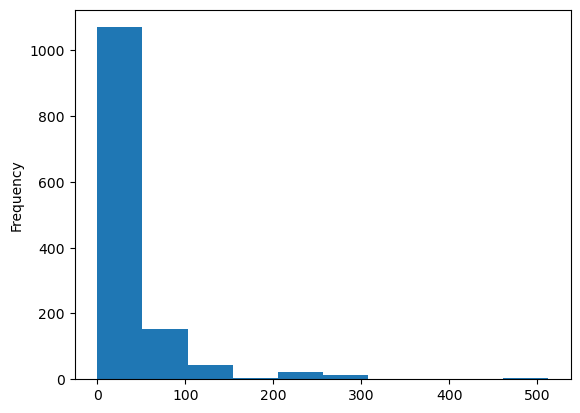

In [20]:
# visualizar dados da coluna por histograma
df["fare"].plot(kind = "hist")

<Axes: ylabel='Density'>

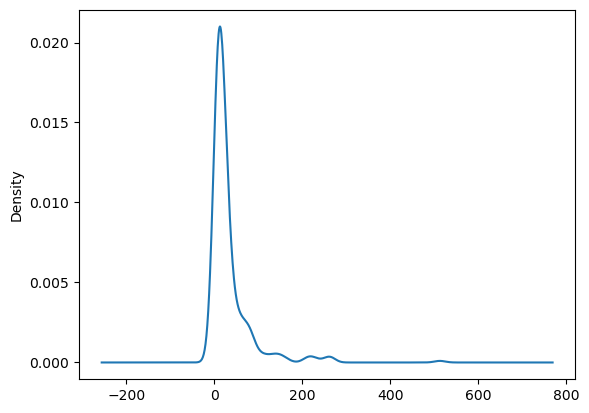

In [21]:
df["fare"].plot(kind = "kde")

# Qual a taxa de sobrevivencia do titanic?

In [22]:
df["survived"]

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [23]:
df["survived"].nunique()

2

In [24]:
df["survived"].unique()

array([1, 0], dtype=int64)

In [25]:
df["survived"].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

In [26]:
(df["survived"].value_counts(normalize = True))*100

survived
0    61.802903
1    38.197097
Name: proportion, dtype: float64

# Qual a propoção de homens/mulheres que morreram/sobreviveram?

In [27]:
# filtrar data frame por variaveis homem/mulher

df[df["sex"] == "male"]

# df.query("sex == 'male'")



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [28]:
# df[df["sex"] == "female"]

df.query("sex == 'female'")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


In [29]:
# Obtem taxa de sobrevivencia do grupo homens 

df_male = df[df["sex"] == "male"]

(df_male["survived"].value_counts(normalize = True))*100

#(df[df["sex"] == "male"]["survived"].value_counts(normalize = True))*100


survived
0    80.901542
1    19.098458
Name: proportion, dtype: float64

In [30]:
# Obtem taxa de sobrevivencia do grupo mulheres 

df_female = df.query("sex == 'female'")

(df_female["survived"].value_counts(normalize = True))*100

#(df[df["sex"] == "female"]["survived"].value_counts(normalize = True))*100

survived
1    72.746781
0    27.253219
Name: proportion, dtype: float64

# Qual a propoção de homens/mulheres divididos por classes que morreram/sobreviveram?

In [31]:
# homens 1 classe
df_male_1class = df.query("sex == 'male' and pclass == 1")
df_male_1class

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1,0,"Williams, Mr. Charles Duane",male,51.0000,0,1,PC 17597,61.3792,NaN,C,NaN,NaN,"Geneva, Switzerland / Radnor, PA"
317,1,1,"Williams, Mr. Richard Norris II",male,21.0000,0,1,PC 17597,61.3792,NaN,C,A,NaN,"Geneva, Switzerland / Radnor, PA"
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,NaN,NaN,"London, England"
320,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,D,NaN,"London, England"


In [32]:
(df_male_1class["survived"].value_counts(normalize = True))*100

survived
0    65.921788
1    34.078212
Name: proportion, dtype: float64

In [33]:
# homens 2 classe
df_male_2class = df.query("sex == 'male' and pclass == 2")
df_male_2class

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
323,2,0,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.000,NaN,C,NaN,NaN,"Russia New York, NY"
325,2,0,"Aldworth, Mr. Charles Augustus",male,30.0,0,0,248744,13.000,NaN,S,NaN,NaN,"Bryn Mawr, PA, USA"
326,2,0,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.500,NaN,S,NaN,NaN,"Buenos Aires, Argentina / New Jersey, NJ"
327,2,0,"Andrew, Mr. Frank Thomas",male,25.0,0,0,C.A. 34050,10.500,NaN,S,NaN,NaN,"Cornwall, England Houghton, MI"
328,2,0,"Angle, Mr. William A",male,34.0,1,0,226875,26.000,NaN,S,NaN,NaN,"Warwick, England"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2,0,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.750,NaN,S,NaN,NaN,"Bournmouth, England"
594,2,0,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.500,NaN,S,NaN,NaN,"Guernsey, England / Edgewood, RI"
595,2,0,"Wheeler, Mr. Edwin 'Frederick'",male,NaN,0,0,SC/PARIS 2159,12.875,NaN,S,NaN,NaN,NaN
596,2,1,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.000,NaN,S,9,NaN,"London, England"


In [34]:
(df_male_2class["survived"].value_counts(normalize = True))*100

survived
0    85.380117
1    14.619883
Name: proportion, dtype: float64

In [35]:
# homem 3 classe
df_male_3class = df.query("sex == 'male' and pclass == 3")
df_male_3class

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
600,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,NaN,NaN,NaN
601,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S,NaN,NaN,"East Providence, RI"
602,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S,NaN,190.0,"East Providence, RI"
605,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S,A,NaN,"Perkins County, SD"
606,3,1,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0,0,SOTON/O2 3101284,7.9250,NaN,S,15,NaN,"Taalintehdas, Finland Hoboken, NJ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [36]:
(df_male_3class["survived"].value_counts(normalize = True))*100

survived
0    84.787018
1    15.212982
Name: proportion, dtype: float64

In [37]:
df_female_class1 = df.query("sex == 'female' and pclass == 1")
df_female_class1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,8,NaN,"Youngstown, OH"
314,1,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1,1,113503,211.5000,C80,C,4,NaN,"Elkins Park, PA"
315,1,1,"Willard, Miss. Constance",female,21.0,0,0,113795,26.5500,NaN,S,8 10,NaN,"Duluth, MN"
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,3,NaN,NaN


In [39]:
(df_female_class1["survived"].value_counts(normalize = True))*100

survived
1    96.527778
0     3.472222
Name: proportion, dtype: float64

In [40]:
df_female_class2 = df.query("sex == 'female' and pclass ==2")
df_female_class2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
324,2,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0000,1,0,P/PP 3381,24.00,NaN,C,10,NaN,"Russia New York, NY"
329,2,1,"Angle, Mrs. William A (Florence 'Mary' Agnes H...",female,36.0000,1,0,226875,26.00,NaN,S,11,NaN,"Warwick, England"
333,2,1,"Ball, Mrs. (Ada E Hall)",female,36.0000,0,0,28551,13.00,D,S,10,NaN,"Bristol, Avon / Jacksonville, FL"
337,2,1,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0000,1,0,2908,26.00,NaN,S,13,NaN,"Norwich / New York, NY"
340,2,1,"Becker, Miss. Marion Louise",female,4.0000,2,1,230136,39.00,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,2,1,"West, Miss. Barbara J",female,0.9167,1,2,C.A. 34651,27.75,NaN,S,10,NaN,"Bournmouth, England"
591,2,1,"West, Miss. Constance Mirium",female,5.0000,1,2,C.A. 34651,27.75,NaN,S,10,NaN,"Bournmouth, England"
593,2,1,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0000,1,2,C.A. 34651,27.75,NaN,S,10,NaN,"Bournmouth, England"
598,2,1,"Wright, Miss. Marion",female,26.0000,0,0,220844,13.50,NaN,S,9,NaN,"Yoevil, England / Cottage Grove, OR"


In [41]:
(df_female_class2["survived"].value_counts(normalize = True))*100

survived
1    88.679245
0    11.320755
Name: proportion, dtype: float64

In [42]:
df_female_class3 = df.query("sex =='female' and pclass == 3")
df_female_class3

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
603,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S,A,NaN,"East Providence, RI"
604,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,NaN,S,16,NaN,"Norway Los Angeles, CA"
607,3,1,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,C,NaN,"Greensburg, PA"
610,3,0,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,NaN,NaN,"Sweden Akeley, MN"
612,3,1,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,13,NaN,"London, England Norfolk, VA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


In [43]:
(df_female_class3["survived"].value_counts(normalize = True))*100

survived
0    50.925926
1    49.074074
Name: proportion, dtype: float64

# Respondendo a mesma pergunta de forma simples groupby()

In [47]:
(df.groupby(["pclass","sex"])["survived"].value_counts(normalize = True))*100

pclass  sex     survived
1       female  1           96.527778
                0            3.472222
        male    0           65.921788
                1           34.078212
2       female  1           88.679245
                0           11.320755
        male    0           85.380117
                1           14.619883
3       female  0           50.925926
                1           49.074074
        male    0           84.787018
                1           15.212982
Name: proportion, dtype: float64

# Obtendo estatisticas sobre o valor pago distribuido por sexo e classe social 

In [50]:
df.groupby(["pclass", "sex"])["fare"].agg(["mean","std","min","max"])

mean        std    min       max
pclass sex                                           
1      female  109.412385  82.885854  25.70  512.3292
       male     69.888385  74.079427   0.00  512.3292
2      female   23.234827  11.239817  10.50   65.0000
       male     19.904946  14.775149   0.00   73.5000
3      female   15.324250  11.786512   6.75   69.5500
       male     12.415462  11.261638   0.00   69.5500

# Obtendo os mesmos dados de outra forma

In [52]:
pd.pivot_table(df, "fare", "pclass", "sex", aggfunc=["mean","std","max","min"])

mean                   std                  max            \
sex         female       male     female       male    female      male   
pclass                                                                    
1       109.412385  69.888385  82.885854  74.079427  512.3292  512.3292   
2        23.234827  19.904946  11.239817  14.775149   65.0000   73.5000   
3        15.324250  12.415462  11.786512  11.261638   69.5500   69.5500   

          min       
sex    female male  
pclass              
1       25.70  0.0  
2       10.50  0.0  
3        6.75  0.0

# Qual a relação entre o porto de embarque, a taxa de sobrevivencia e a classe?

In [53]:
df["embarked"].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [55]:
df.groupby(["pclass","embarked"])["survived"].agg(["mean","count"])

mean  count
pclass embarked                 
1      C         0.687943    141
       Q         0.666667      3
       S         0.559322    177
2      C         0.571429     28
       Q         0.285714      7
       S         0.417355    242
3      C         0.366337    101
       Q         0.353982    113
       S         0.210101    495